![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


In [7]:
bikes.hour.describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

Para la variable hour, encontramos que en total son 10886 obsertvaciones contenidas, de las cuales su promedio o media es de 11.54m con una desviacion estandar de 6.915, sin embargo cundo lo Nlizamos no en un total si no por hora del dia vamos a encontrar una distribucion totalmente diferente por cada una de las horas del dia, por ejemplo las 5 de la tarde dodne vemos que tiene un total de 456 observaciones con una desviacio  de 223,77 el minimo es de 15 y su maximo es de 970, finalmente sus quartiles estan ubicados como 25% 277 y su 75% como 608.5.

In [8]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


Para la variable temporada o estacion, encontramos que solo son cuatro que la que tiene una media mayor es la season 3, con una media de 234.4, una desviacion de 197.12, para todas el minimo fue uno pero para la 3 su maxomo es 977, asi su 25% es de 68, mientras que el 75% se ubica en 347

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

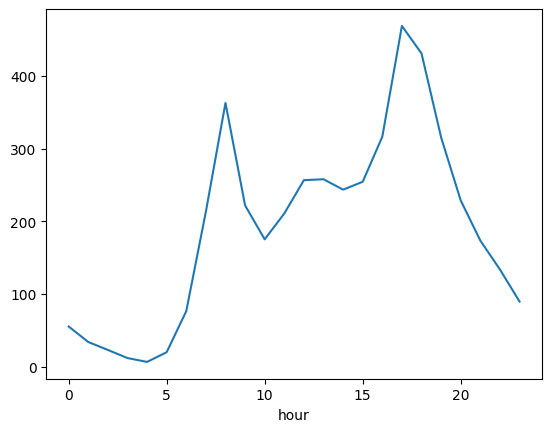

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

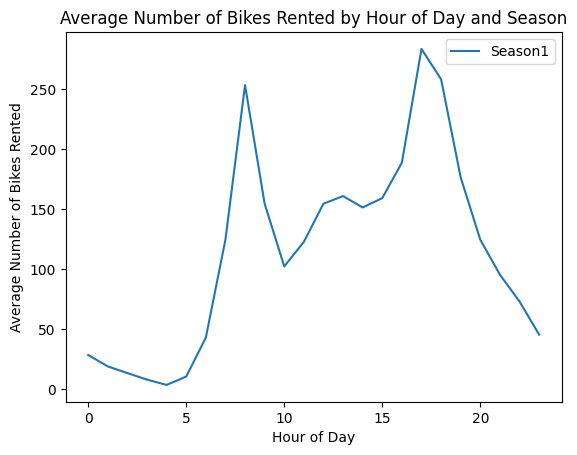

In [10]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_season1 = bikes[bikes.season == 1]


bikes_season1.groupby('hour').total.mean().plot(label='Season1')


plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Bikes Rented')
plt.title('Average Number of Bikes Rented by Hour of Day and Season')
plt.legend()
plt.show()

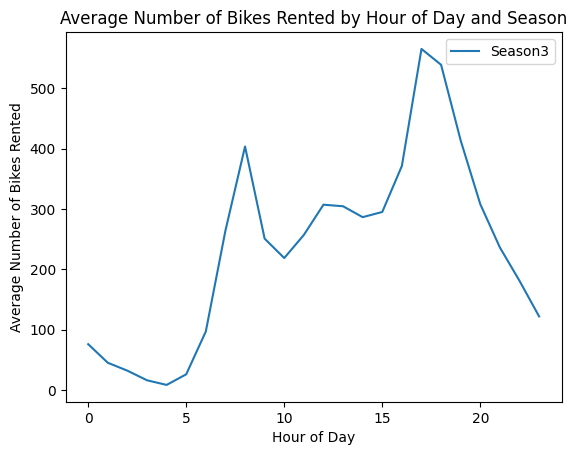

In [11]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

bikes_season3 = bikes[bikes.season == 3]


bikes_season3.groupby('hour').total.mean().plot(label='Season3')

plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Bikes Rented')
plt.title('Average Number of Bikes Rented by Hour of Day and Season')
plt.legend()
plt.show()

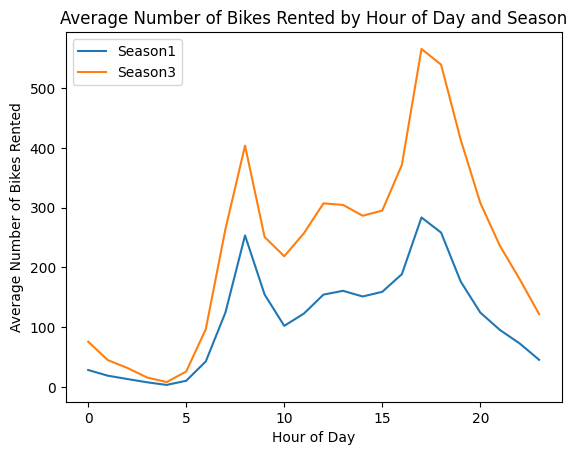

In [12]:
bikes_season1.groupby('hour').total.mean().plot(label='Season1')
bikes_season3.groupby('hour').total.mean().plot(label='Season3')

plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Bikes Rented')
plt.title('Average Number of Bikes Rented by Hour of Day and Season')
plt.legend()
plt.show()

En la grafica final podemos encontrar que si comparamos las dos grafcias creadas en los puntos anteriores para la season 1 y 3, vamos a encontrar que en la temporada 3 o en la estacion 3 se renta un mayor numero de bicicletas, especial mente entre las 15 y 20 horas, tambien podemos concluir que al rededor de las 9 de la manan tambien se presenta un pico de rentas, pero en general siendo la temporada tres con mas actividad el comportamiento durante el dia es muy parecido al comparar las dos estaciones.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [13]:
# Celda 3

#teiendo en cuenta que la variable season contiene tres categorias, creamos variables dummies para cada una de las 4 estaciones y la anadimos  a la base original 
season_d = pd.get_dummies(bikes['season'], prefix='season')
bikes_sd = pd.concat([bikes, season_d], axis=1)
X = bikes_sd[['hour', 'season_1', 'season_2', 'season_3', 'season_4']]
y = bikes_sd['total']
#una vez identificada la variable de respuesta total como Y y las varaibles predictorias en el set X, procedomos a calcular la regresion linear del set de datos

bikes_lr = LinearRegression()
bikes_lr.fit(X, y)

print(bikes_lr.intercept_, bikes_lr.coef_, bikes_lr.score(X, y))





69.53671247143535 [ 10.54520609 -75.96697493  24.35025698  43.50057501   8.11614294] 0.22339339904452493


In [14]:
#regresion lineal con stats model

import statsmodels.api as sm

X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     782.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:52:28   Log-Likelihood:                -70669.
No. Observations:               10886   AIC:                         1.413e+05
Df Residuals:                   10881   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6294      2.382     23.354      0.0

LAs limitaciones que se presentan esque realmente el modelo no tiene unos estimadores generales del modelos coansiderando als variables obtenidas que expliquen los resultados del modelo, por loq ue sus predicciones no serian acertadas respecto a lo esperado.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [15]:
# Celda 4

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001


# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [16]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [17]:
j, split, gain = best_split(X, y, 6)
j, split, gain

(1, 6.0, 18120.937290485905)

In [18]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [19]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 2684, 8202)

In [20]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 25.177719821162444, 246.025237746891)

In [21]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [22]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [23]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [1, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [2, 1.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 51.3051094890511,
      'level': 5,
      'split': [1, 1.0],
      'n_samples': 683,
      'gain': 316.1751143186211,
      'sl': {'y_pred': 1,
       'y_prob': 63.63953488372093,
       'level': 6,
       'split': -1,
       'n_samples': 342,
   

In [24]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [25]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'Accuracy')

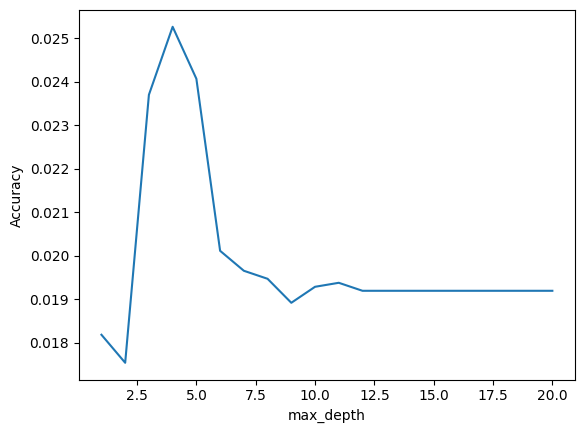

In [26]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')


In [27]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.025261134067952253, 4)

In [28]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [29]:
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.017545
std       0.005895
min       0.007353
25%       0.015611
50%       0.018382
75%       0.020895
max       0.024793
dtype: float64

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [30]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [31]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [32]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [33]:
# Celda 6
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Definición de 4 modelos diferentes: regresión logística, árbol de decisión,Navie Bayes y k vecinos más cercanos
models = {'logr': LogisticRegression(),
          'dt': DecisionTreeRegressor()}

In [34]:
# Entrenamiento (fit) de cada modelo
for model in models.keys():
    models[model].fit(X_train, y_train)

In [35]:
# Predicción de las observaciones del set de test para cada modelo
y_pred = pd.DataFrame(index=y_test, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [36]:
# Evaluación del error de cada modelo
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

logr 0.621825270205921
dt 0.6801960501698512


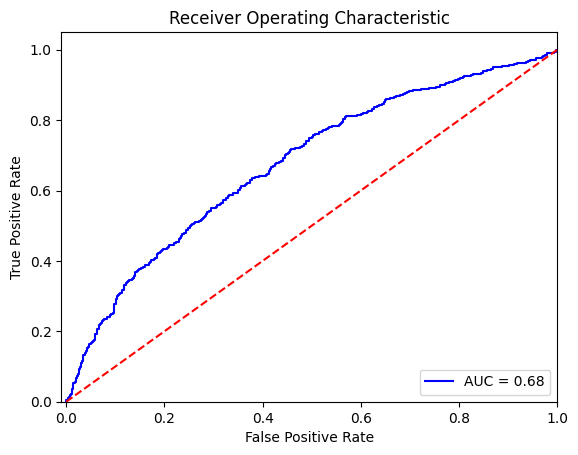

In [37]:
#Modelo de regresión logística
#Se entrena el modelo
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)
#Se hacen las predicciones 
prediccionesRegLog=clfRegLog.predict(X_test)
prediccionesProbRegLog=clfRegLog.predict_proba(X_test)
#se grafica la curva ROC y se calcula el AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionesProbRegLog[:,1], pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
y_pred = clfRegLog.predict(X_test)

# Matriz de confusión
print(' ')
print('Matriz de confusión: ')
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


#accuracy
accuracyLR = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy: ' + str(accuracyLR))

#precision
precisionLR = precision_score(y_true=y_test, y_pred=y_pred)
print('Precision: '+ str(precisionLR))

#F1-Score
F1ScoreLR = f1_score(y_true=y_test, y_pred=y_pred)
print('Precision: '+ str(F1ScoreLR))


#mean_squared_error
msqeLR = mean_squared_error(y_true=y_test, y_pred=y_pred)
print('mean_squared_error: '+ str(msqeLR))





 
Matriz de confusión: 
[[493 251]
 [311 445]]
Accuracy: 0.6253333333333333
Precision: 0.639367816091954
Precision: 0.6129476584022039
mean_squared_error: 0.37466666666666665


In [39]:
#Modelo de regresión logística
#Se entrena el modelo
clfArbol= DecisionTreeRegressor(random_state = 0) 
clfArbol.fit(X_train,y_train)
#Se hacen las predicciones 
prediccionesArbol=clfArbol.predict(X_test)


In [40]:
y_pred = clfArbol.predict(X_test)

# Matriz de confusión
print(' ')
print('Matriz de confusión: ')
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


#accuracy
accuracyArbol = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy: ' + str(accuracyArbol))

#precision
precisionArbol = precision_score(y_true=y_test, y_pred=y_pred)
print('Precision: '+ str(precisionLR))

#F1-Score
F1_ScoreArbol = f1_score(y_true=y_test, y_pred=y_pred)
print('F1-Score: '+ str(F1_ScoreArbol))


#mean_squared_error
msqeArbol = mean_squared_error(y_true=y_test, y_pred=y_pred)
print('mean_squared_error: '+ str(msqeArbol))



 
Matriz de confusión: 
[[399 345]
 [347 409]]
Accuracy: 0.5386666666666666
Precision: 0.639367816091954
F1-Score: 0.5417218543046358
mean_squared_error: 0.4613333333333333


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [41]:
# Celda 7
n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [42]:

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=5, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)


In [43]:
# Desempeño al hacer votación mayoritaria
metrics.f1_score(y_pred, y_test)

0.6603389830508474

In [44]:
metrics.accuracy_score(y_pred, y_test)

0.666

In [45]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

vmf1 = metrics.f1_score(y_pred, y_test)
vmacc = metrics.accuracy_score(y_pred, y_test)
                      
print('f1-Score: '+ str(vmf1))
print('accuracy: '+ str(vmacc))


f1-Score: 0.653252850435949
accuracy: 0.6553333333333333


In [46]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier

clf_l = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_l.fit(X_train, y_train)
y_pred_l = clf_l.predict(X_test)


vmf1_l = metrics.f1_score(y_pred_l, y_test)
vmacc_l = metrics.accuracy_score(y_pred_l, y_test)
                      
print('f1-Score: '+ str(vmf1_l))
print('accuracy: '+ str(vmacc_l))

f1-Score: 0.6569920844327177
accuracy: 0.6533333333333333


In [48]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier

clf_r = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=100), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_r.fit(X_train, y_train)
y_pred_r = clf_r.predict(X_test)


vmf1_r = metrics.f1_score(y_pred_r, y_test)
vmacc_r = metrics.accuracy_score(y_pred_r, y_test)
                      
print('f1-Score: '+ str(vmf1_r))
print('accuracy: '+ str(vmacc_r))

f1-Score: 0.6125760649087221
accuracy: 0.618


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [49]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

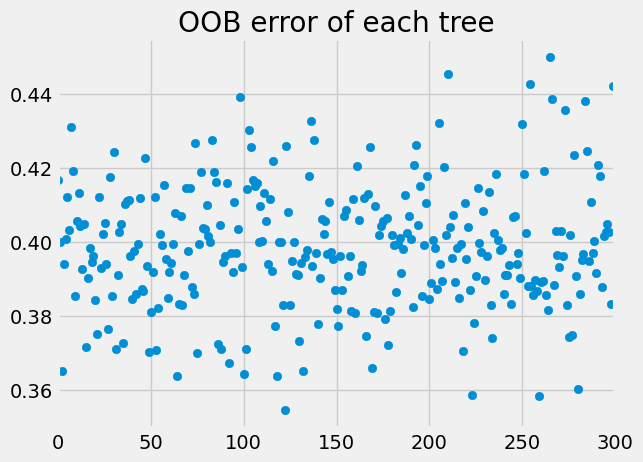

In [50]:
# Visualización de OOB para cada árbol
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [51]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [52]:
# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

1483    0.892323
2185    0.855757
2520    0.768492
3721    0.890961
3727    0.082843
4524    0.609491
234     0.049816
4735    0.176096
5839    0.340335
2939    0.642539
3053    0.835483
867     0.847309
276     0.953874
5798    0.036227
3512    0.908706
5789    0.059910
3198    0.755884
5908    0.956919
5718    0.105532
2687    0.105969
dtype: float64

In [53]:
# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6594301221166894, 0.6653333333333333)

In [54]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [55]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6563758389261746, 0.6586666666666666)

In [57]:
errors = np.zeros(clf_l.n_estimators)
y_pred_all_l = np.zeros((X_test.shape[0], clf_l.n_estimators))

for i in range(clf_l.n_estimators):
    oob_sample = ~clf_l.estimators_samples_[i]
    y_pred__l = clf_l.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred__l, y_train.values[oob_sample])
    y_pred_all_l[:, i] = clf_l.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_l = (np.sum(y_pred_all_l * alpha, axis=1) >= 0.5).astype(np.int)

In [58]:
metrics.f1_score(y_pred_l, y_test), metrics.accuracy_score(y_pred_l, y_test)

(0.6495263870094723, 0.6546666666666666)

In [59]:
errors = np.zeros(clf_r.n_estimators)
y_pred_all_r = np.zeros((X_test.shape[0], clf_r.n_estimators))

for i in range(clf_r.n_estimators):
    oob_sample = ~clf_r.estimators_samples_[i]
    y_pred__r = clf_r.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred__r, y_train.values[oob_sample])
    y_pred_all_r[:, i] = clf_r.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_r = (np.sum(y_pred_all_r * alpha, axis=1) >= 0.5).astype(np.int)

In [60]:
metrics.f1_score(y_pred_r, y_test), metrics.accuracy_score(y_pred_r, y_test)

(0.6129905277401894, 0.6186666666666667)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9


En General los resultados tanto de F1 Score como de accuracy obtenidos para el punto ocho son mejores comparados con los que resltaron de los calculos en el siete, es posble que computacionalmente la votacion ponderada consuma mas recursos, finalmente algo que se presenta comun en tanto en la ponderada como en la mayoritaria, con respecto a los calculos con el estimador de regrecion logistica son peores comparadas con los de arboles de decision.